# TIME SERIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train_new.csv')

In [3]:
## Cleaning up the data , changing name of columns
df=df[["YrSold","SalePrice"]]
df.head(30)

,YrSold,SalePrice
0,2008,208500
1,2007,181500
2,2008,223500
3,2006,140000
4,2008,250000
5,2009,143000
6,2007,307000
7,2009,200000
8,2008,129900
9,2008,118000


In [4]:
df['YrSold'].value_counts() #repeating year categories.should time series be applied?

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [5]:
df['YrSold'].dtypes

dtype('int64')

In [6]:
df.shape

(1460, 2)

In [7]:
df.tail()

,YrSold,SalePrice
1455,2007,175000
1456,2010,210000
1457,2010,266500
1458,2010,142125
1459,2008,147500


In [8]:
# Convert Month into Datetime
df['YrSold']=pd.to_datetime(df['YrSold'],format='%Y')


In [9]:
df.head()

,YrSold,SalePrice
0,2008-01-01,208500
1,2007-01-01,181500
2,2008-01-01,223500
3,2006-01-01,140000
4,2008-01-01,250000


In [10]:
df.tail()

,YrSold,SalePrice
1455,2007-01-01,175000
1456,2010-01-01,210000
1457,2010-01-01,266500
1458,2010-01-01,142125
1459,2008-01-01,147500


In [11]:
df.set_index('YrSold',inplace=True)

In [12]:
df.head()

,SalePrice
YrSold,
2008-01-01,208500
2007-01-01,181500
2008-01-01,223500
2006-01-01,140000
2008-01-01,250000


In [13]:
df.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


## Step 2: Visualize the Data

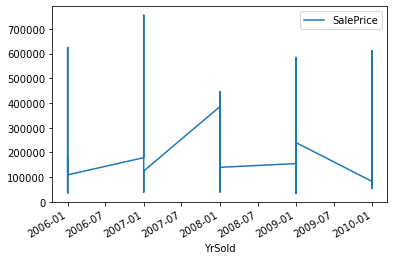

In [14]:
df.plot()

# Selecting the model after visualization

In [15]:
#As the data we have considered all the sale in a year is accounted on the month 1st every year,
#there is no monthly data.
#that is why the graph is like this.vertical rising blue dots bcaz all the sale in a year is accounted on the month 1st every year.

###### In above plot data looks seasonal .

   Usually in seasonal data we use SARIMAX.
           in irregular(non-seasonal) we use ARIMAX.
           
   Here we will implement SARIMAX as our data is seasonal with sale on 1st of every year only.
   

###### Now,1st we will check if data is STATIONARY or not.

# Here we will implement SARIMAX as our data is seasonal with sale only on 1st of every year only.

# Testing For Stationarity

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['SalePrice']) # adfuller give us 5 values

In [18]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-38.223698493243106, 0.0, 0, 1459, {'1%': -3.4348399537053482, '5%': -2.8635230163107837, '10%': -2.5678257404326903}, 36463.44568903623)


### Most important value is p-value above(2nd value(0.0))

# Ho(null hypothesis): time series is non-stationary          
# H1(altenative): time series is stationary

# Step-1.Rolling/Addfuller

In [19]:
#Ho: It is non stationary
#H1: It is stationary
#considered 0.05 in general.

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,just variable name changed('Sales' to sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [20]:
adfuller_test(df['SalePrice']) #call the function

ADF Test Statistic : -38.223698493243106
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1459
strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary


## Auto Regressive Model(AR)--Just for visualization
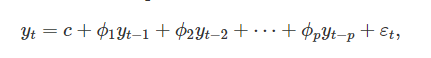

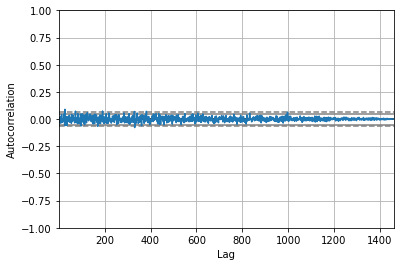

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['SalePrice']) 
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

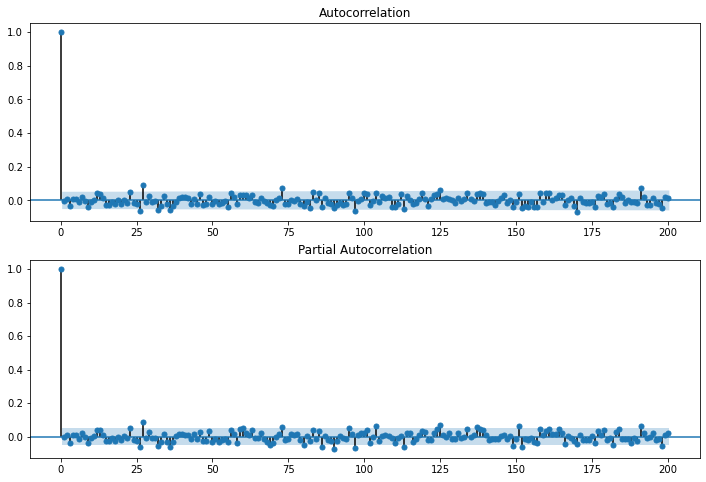

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df['SalePrice'],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['SalePrice'],lags=200,ax=ax2)

# Model building

# Implementing SARIMAX model

In [27]:
df.head()

,SalePrice
YrSold,
2008-01-01,208500
2007-01-01,181500
2008-01-01,223500
2006-01-01,140000
2008-01-01,250000


In [24]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [25]:
model=sm.tsa.statespace.SARIMAX(df['SalePrice'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()                                                              #.shift(value) 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

In [26]:
df['forecast']=results.predict(start=100,end=800,dynamic=True)


ValueError: cannot reindex from a duplicate axis

In [ ]:
# This error is because of the repeated year values in the index('YrSold'feature),also the month & day is automatically set to 1.
# What to do?